Notebook for Session 2 Lessons: Training A Network with Tensorflow 

Lecture 2.8: Setting Up the Data 

In [1]:
# Get necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
    
# We'll tell matplotlib to inline any drawn figures like so:
%matplotlib inline
plt.style.use('ggplot')

Create some noisy sine wave as example

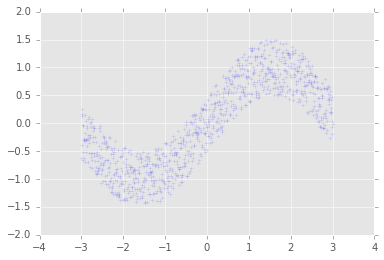

In [2]:
n_observations = 1000
xs = np.linspace(-3,3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs,ys, alpha=0.15, marker = '+')

Lecture 2.9: Creating the Neural Network

(array([   7.,   28.,   63.,  138.,  236.,  215.,  173.,   99.,   32.,    9.]),
 array([-3.09905076, -2.51108899, -1.92312722, -1.33516545, -0.74720368,
        -0.15924191,  0.42871985,  1.01668162,  1.60464339,  2.19260516,
         2.78056693]),
 <a list of 10 Patch objects>)

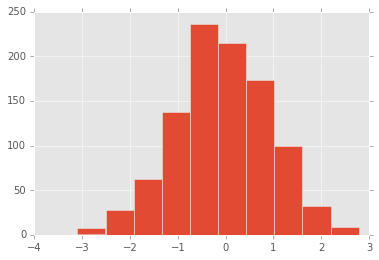

In [3]:
# Import Tensorflow
import tensorflow as tf


X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

use another Standard Deviation (0.1)

(array([   6.,   32.,   96.,  228.,  290.,  204.,  106.,   30.,    6.,    2.]),
 array([-0.31937286, -0.2474611 , -0.17554935, -0.10363759, -0.03172583,
         0.04018593,  0.11209769,  0.18400944,  0.2559212 ,  0.32783296,
         0.39974472]),
 <a list of 10 Patch objects>)

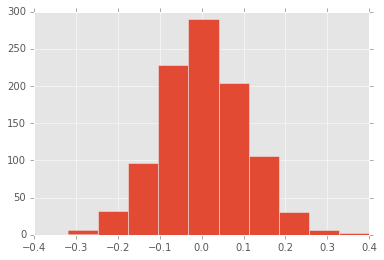

In [4]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

create a Tensorflow variables

In [5]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')
B = tf.Variable(tf.constant([1], dtype=tf.float32), name='bias')

create output prediction

In [6]:
Y_pred = W*X + B

create a function for the Measure of Distance ( L1 Norm )

In [7]:
def distance(p1,p2):
    return tf.abs(p1-p2)

In [8]:
cost = distance(Y_pred, tf.sin(X))  # cost = distance(Y_pred, ?)

In [9]:
cost = distance(Y_pred, Y)

In [10]:
cost = tf.reduce_mean(distance(Y_pred, Y))

Lecture 2.10: Training the Neural Network

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

run for 500 iterations

In [14]:
n_iterations = 500

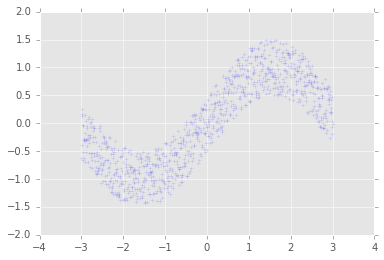

In [15]:
fig, ax = plt.subplots(1,1)
ax.scatter(xs,ys, alpha=0.15, marker = '+')

1.00173
0.919237
0.841975
0.76964
0.703441
0.645516
0.595343
0.554757
0.520786
0.49268
0.470729
0.454065
0.441573
0.431419
0.423761
0.4179
0.413584
0.410438
0.407985
0.406215
0.404823
0.403617
0.402676
0.401995
0.401392
0.400871
0.400519
0.40028
0.400118
0.400023
0.399971
0.399936
0.399908
0.399885
0.399869


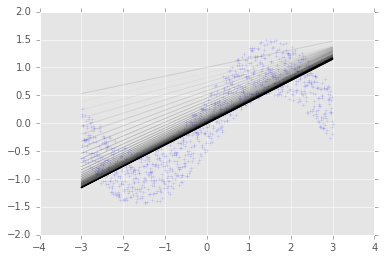

In [16]:
with tf.Session() as sess:
    # Here we tell tensorflow that we want to inititialize all
    # the variables in the graph so we can use them.
    # This will set 'W' and 'B' to their initial random normal value.
    sess.run(tf.initialize_all_variables())
    
    # let's plot the x versus the predicted Y
    ys_pred = Y_pred.eval(feed_dict={X:xs}, session= sess)
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs,ys, alpha=0.15, marker = '+')
    ax.plot(xs, ys_pred, 'k', alpha =0.1)
    plt.draw()
    
    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer,feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        
        # every 10 iterations
        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X:xs}, session= sess)
            ax.plot(xs, ys_pred, 'k', alpha = it_i/n_iterations )
            plt.draw()
            # And let's print out training cost: mean of absolute differences
            print(training_cost)
        # Allow the trainimg to quit if we've reaached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        
        #Keep track of the training cost
        prev_training_cost = training_cost
            
        

Lecture 2.11: Stochastic and Mini Batch Gradient Descent

In [17]:
idxs = np.arange(100)

In [18]:
batch_size = 10

In [19]:
n_batches = len(idxs)// batch_size

In [20]:
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i +1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


permute indexes

In [21]:
rand_idxs = np.random.permutation(idxs)

In [22]:
batch_size = 10

In [23]:
n_batches = len(rand_idxs)// batch_size

In [24]:
print('# of batches:', n_batches)

# of batches: 10


In [25]:
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i +1) * batch_size])

[22 89 74 62 70 98 31 34 66 50]
[67 14 58 47 28 99 87 49 85 54]
[82 39 65  0  4 96 78 90 71 83]
[21 36 30 24 26 44 75 61 80 73]
[41 69 63 84 51 29 56 12 37  8]
[76  9  2 86 32 93  3 11 46 59]
[ 7 25 88 33 45 77 42 53 64 38]
[40 95 79 68 48 52 10 23 15  6]
[55 81 16 57 92  1  5 18 94 13]
[17 97 35 91 19 20 27 60 72 43]


1.01193
0.935147
0.861319
0.789824
0.722912
0.662725
0.610015
0.565823
0.529907
0.500113
0.476214
0.45827
0.444674
0.434073
0.425672
0.419347
0.414618
0.41122
0.408555
0.406664
0.405176
0.403926
0.402897
0.402179
0.401551
0.400999
0.400599
0.400335
0.400155
0.400044
0.399984
0.399944
0.399915
0.39989
0.399873
0.399862
0.399855
0.399852
0.399851
0.399849
0.399847
0.399846
0.399844
0.399842
0.399841
0.39984
0.399839
0.399839
0.399839
0.399839


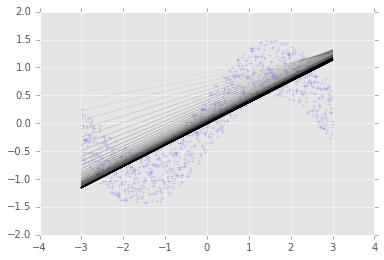

In [26]:
batch_size = 1000
fig, ax = plt.subplots(1,1)
ax.scatter(xs,ys, alpha=0.15, marker = '+')
ax.set_xlim([-4,4])
ax.set_ylim([-2,2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to inititialize all
    # the variables in the graph so we can use them.
    # This will set 'W' and 'B' to their initial random normal value.
    sess.run(tf.initialize_all_variables())
    
    # We now run a loop over epochs
    
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size : (batch_i +1) * batch_size]
            sess.run(optimizer,feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        
        # every 10 iterations
        if it_i % 10 == 0:
            # ys_pred = Y_pred.eval(feed_dict={X:xs}, session= sess)
            # And let's print out training cost: mean of absolute differences
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session= sess)
                ax.plot(xs, ys_pred, 'k', alpha = it_i/n_iterations )
                plt.draw()
            
                print(training_cost)


Define that as a function

In [27]:
def train(X,Y,Y_pred, n_iterations=100, batch_size= 200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs,ys, alpha=0.15, marker = '+')
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    with tf.Session() as sess:
    # Here we tell tensorflow that we want to inititialize all
    # the variables in the graph so we can use them.
    # This will set 'W' and 'B' to their initial random normal value.
        sess.run(tf.initialize_all_variables())
    
        # We now run a loop over epochs
    
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size : (batch_i +1) * batch_size]
                sess.run(optimizer,feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            
            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        
            # every 10 iterations
            if it_i % 10 == 0:
                # ys_pred = Y_pred.eval(feed_dict={X:xs}, session= sess)
                # And let's print out training cost: mean of absolute differences
                print(training_cost)
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session= sess)
                # fig, ax = plt.subplots(1,1)
                ax.plot(xs, ys_pred, 'k', alpha = it_i/n_iterations )
                plt.draw()

In [28]:
n_neurons = 100

In [29]:
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

In [30]:
h = tf.matmul(tf.expand_dims(X,1),W) + b

In [31]:
Y_pred = tf.reduce_sum(h,1)

Retrain wit new Y_pred

2.38104
1.84672
2.71782
2.72546
2.83958
2.78685
2.80958
3.2327
2.14717
2.46001


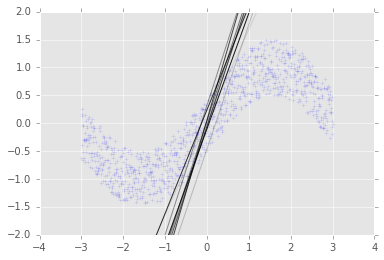

In [32]:
train(X,Y,Y_pred)